In [1]:
%reset
%matplotlib inline
import numpy as np
import scipy.io as sio
import netCDF4 as nc
import glob, os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] =10000000000000000000000000.0

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Reading in data. 
### Experiment 24 is standard (1km wide mouth, 0.03Pa winds)
### Experiment 26 is no wind
### Experiment 27 is 5km wide mouth
### Experiment 28 is 10km wide mouth
### Experiment 31 is high viscosity and high wind (0.1Pa)
### Experiment 32 is no tides

In [2]:
%cd /work/eay/MITgcm_data/Experiment24/

file24 = nc.Dataset('Salt.nc')
Time24 = file24.variables['T'][:]

NX = 600
NY = 1000
NZ = 120

xq = (file24.variables['X'][:])
yq = (file24.variables['Y'][:])
zl = (file24.variables['Z'][:])
print(Time24[-1]/86400)

%cd /work/eay/MITgcm_data/

/work2/eay/MITgcm_data/Experiment24
3.1
/work2/eay/MITgcm_data


In [3]:
%cd /work/eay/MITgcm_data/Experiment26/
file26 = nc.Dataset('Salt.nc')
Time26 = file26.variables['T'][:]
print(Time26[-1]/86400)

%cd /work/eay/MITgcm_data/Experiment27/
file27 = nc.Dataset('Salt.nc')
Time27 = file27.variables['T'][:]
print(Time27[-1]/86400)

%cd /work/eay/MITgcm_data/Experiment28/
file28 = nc.Dataset('Salt.nc')
Time28 = file28.variables['T'][:]
print(Time28[-1]/86400)

%cd /work/eay/MITgcm_data/Experiment31/
file31 = nc.Dataset('Salt2.nc')
Time31 = file31.variables['T'][:]
print(Time31[-1]/86400)

%cd /work/eay/MITgcm_data/Experiment32/
file32 = nc.Dataset('Salt.nc')
Time32 = file32.variables['T'][:]
print(Time32[-1]/86400)

%cd /work/eay/MITgcm_data/

/work2/eay/MITgcm_data/Experiment26
3.1
/work2/eay/MITgcm_data/Experiment27
3.1
/work2/eay/MITgcm_data/Experiment28
3.1
/work2/eay/MITgcm_data/Experiment31
3.1
/work2/eay/MITgcm_data/Experiment32
3.1
/work2/eay/MITgcm_data


In [4]:
index = -1

mask24 = file24.variables['S'][0,0,:,:]; newmask24 = file24.variables['S'][0,:,:,:]
mask26 = file26.variables['S'][0,0,:,:]; newmask26 = file26.variables['S'][0,:,:,:]
mask27 = file27.variables['S'][0,0,:,:]; newmask27 = file27.variables['S'][0,:,:,:]
mask28 = file28.variables['S'][0,0,:,:]; newmask28 = file28.variables['S'][0,:,:,:]
mask31 = file31.variables['S'][0,0,:,:]; newmask31 = file31.variables['S'][0,:,:,:]
mask32 = file32.variables['S'][0,0,:,:]; newmask32 = file32.variables['S'][0,:,:,:]



Salt24 = file24.variables['S'][index,:,:,:]; Salt24[newmask24==0]=np.nan
Sref = Salt24*0.0+34.0
hf24=0.1*np.nansum((Sref-Salt24)/34.0,axis=0)
hf24[(mask24==0)]=np.nan

Salt26 = file26.variables['S'][index,:,:,:]; Salt26[newmask26==0]=np.nan
Sref = Salt26*0.0+34.0
hf26=0.1*np.nansum((Sref-Salt26)/34.0,axis=0)
hf26[(mask26==0)]=np.nan

Salt27 = file27.variables['S'][index,:,:,:]; Salt27[newmask27==0]=np.nan
Sref = Salt27*0.0+34.0
hf27=0.1*np.nansum((Sref-Salt27)/34.0,axis=0)
hf27[(mask27==0)]=np.nan

Salt28 = file28.variables['S'][index,:,:,:]; Salt28[newmask28==0]=np.nan
Sref = Salt28*0.0+34.0
hf28=0.1*np.nansum((Sref-Salt28)/34.0,axis=0)
hf28[(mask28==0)]=np.nan

Salt31 = file31.variables['S'][index,:,:,:]; Salt31[newmask31==0]=np.nan
Sref = Salt31*0.0+34.0
hf31=0.1*np.nansum((Sref-Salt31)/34.0,axis=0)
hf31[(mask31==0)]=np.nan

Salt32 = file32.variables['S'][index,:,:,:]; Salt32[newmask32==0]=np.nan
Sref = Salt32*0.0+34.0
hf32=0.1*np.nansum((Sref-Salt32)/34.0,axis=0)
hf32[(mask32==0)]=np.nan

hf24_alongshore = np.nansum(hf24*100,axis=0) #100m grid spacing
hf26_alongshore = np.nansum(hf26*100,axis=0) #100m grid spacing
hf27_alongshore = np.nansum(hf27*100,axis=0) #100m grid spacing
hf28_alongshore = np.nansum(hf28*100,axis=0) #100m grid spacing
hf31_alongshore = np.nansum(hf31*100,axis=0) #100m grid spacing
hf32_alongshore = np.nansum(hf32*100,axis=0) #100m grid spacing
# hf_alongshore.shape


print('done!')

done!


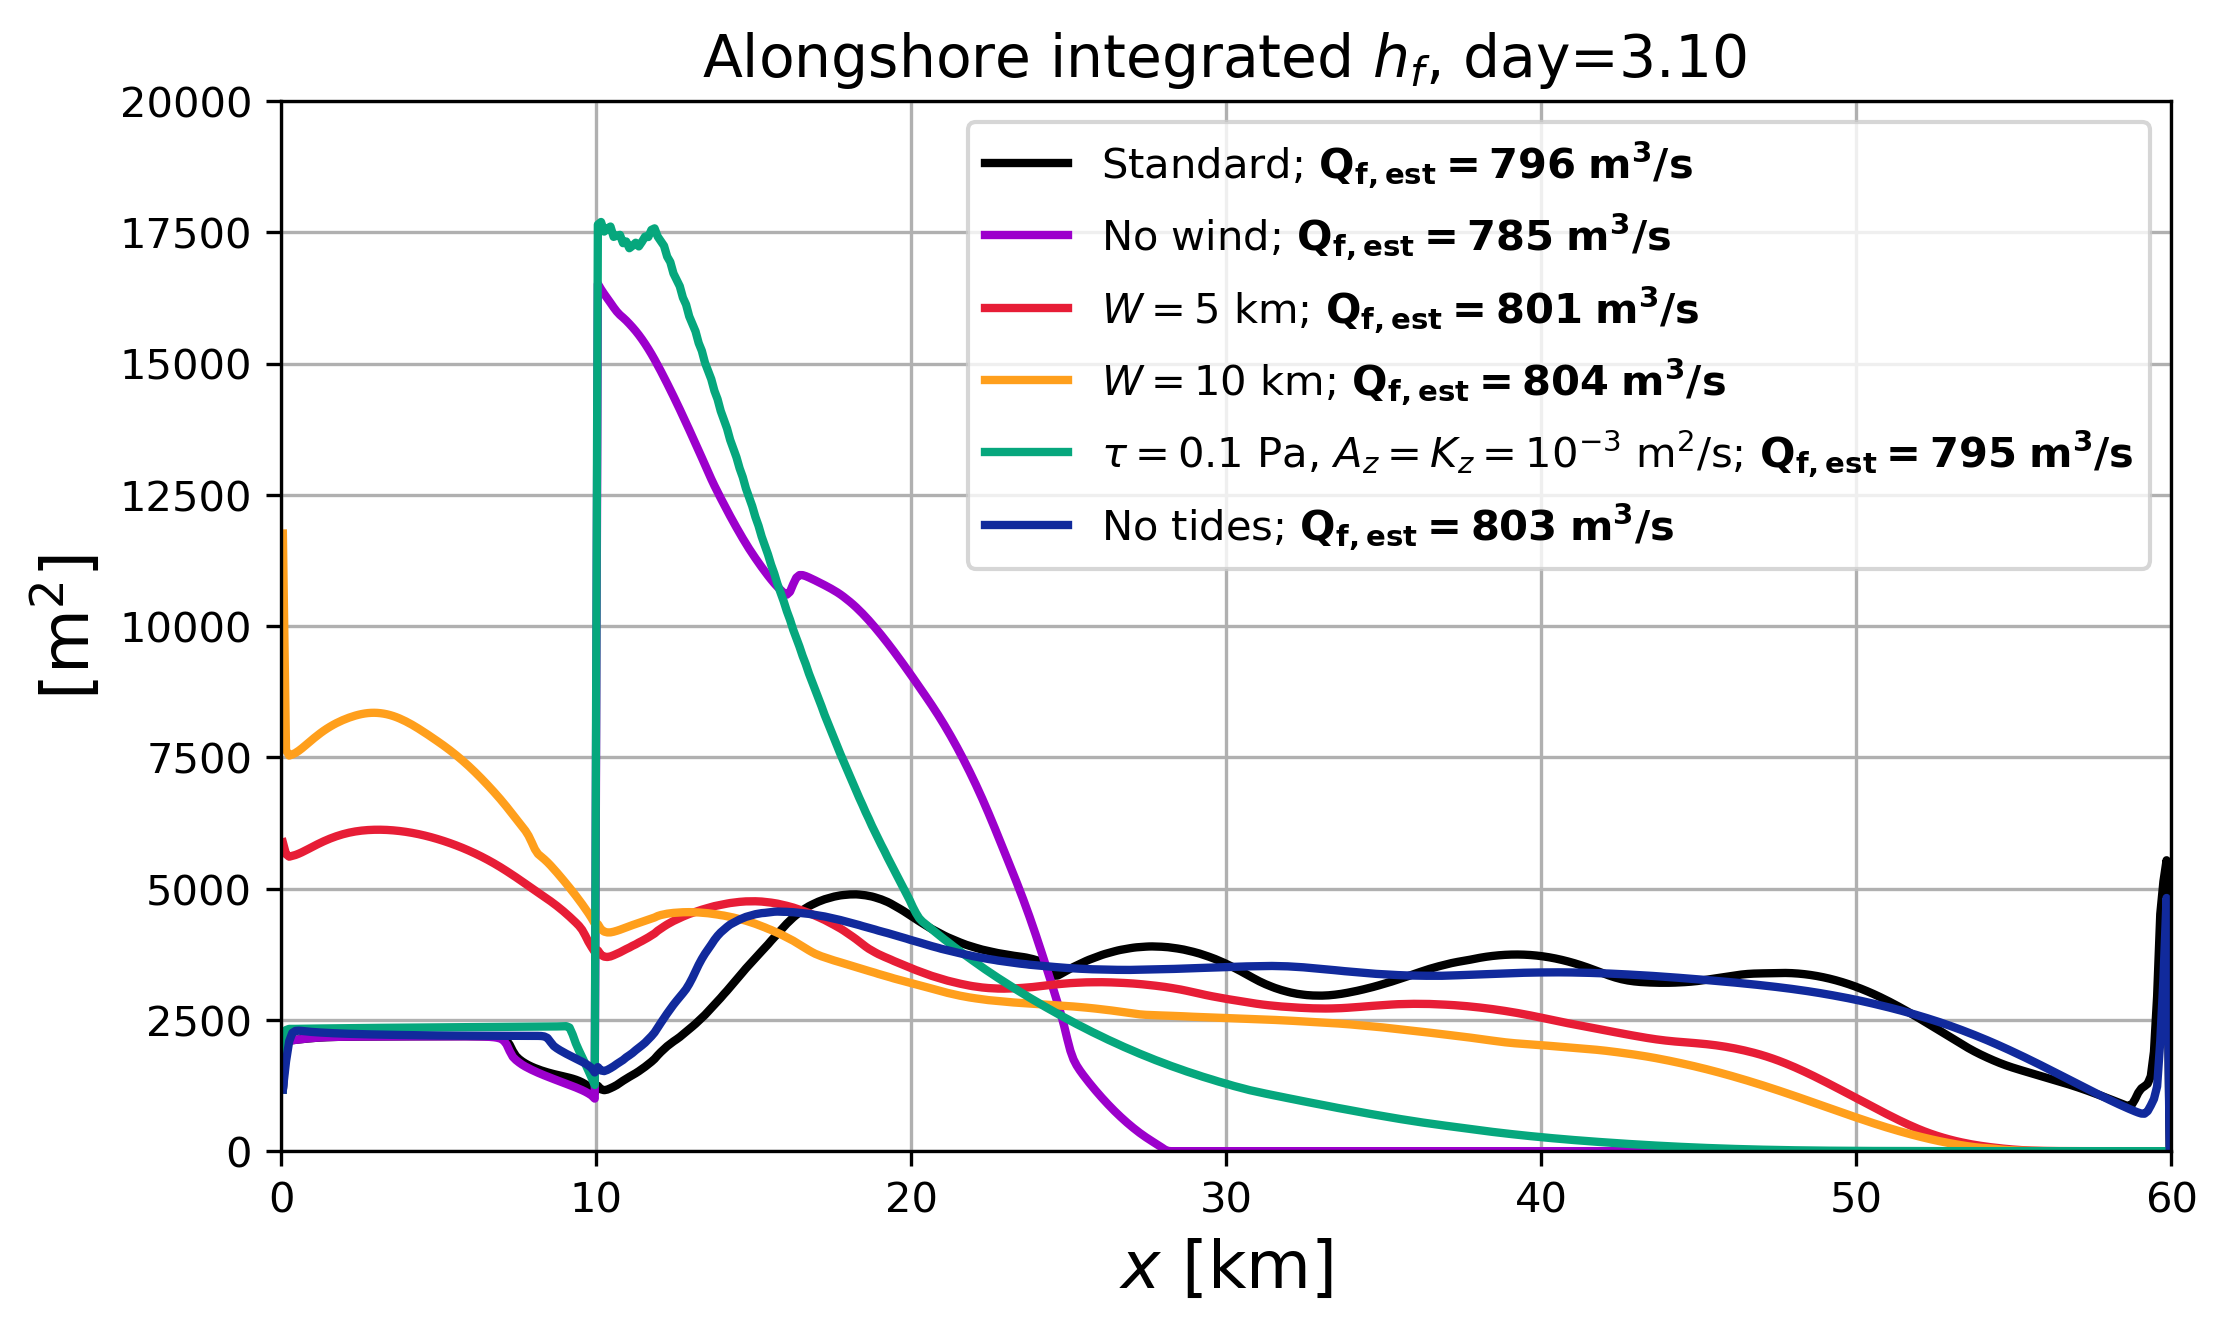

In [33]:
colors = plt.cm.Accent(np.linspace(0,1,5))

fig = plt.figure(figsize=(9, 5), dpi= 300, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.15,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)


line1, =ax1.plot(xq/1000,hf24_alongshore,linewidth=2,color = 'k')
line2, =ax1.plot(xq/1000,hf26_alongshore,linewidth=2,color='#9c00cc')
line3, =ax1.plot(xq/1000,hf27_alongshore,linewidth=2,color='#e71d36')
line4, =ax1.plot(xq/1000,hf28_alongshore,linewidth=2,color='#ff9f1c')
line5, =ax1.plot(xq/1000,hf31_alongshore,linewidth=2,color='#06a77d')
line6, =ax1.plot(xq/1000,hf32_alongshore,linewidth=2,color='#112a9c')

ax1.set_title('Alongshore integrated $h_f$, day=%04.2f ' %(149/48.), fontsize=14)
ax1.set_xlabel('$x$ [km]',fontsize=16)
ax1.set_ylabel('[m$^2$]',fontsize=16)
ax1.set_xlim([0,60]);ax1.set_ylim([0,20000])
ax1.legend([r'Standard; $\bf{Q_{f,est}=796 \; m^3/s}$',
            r'No wind; $\bf{Q_{f,est}=785 \; m^3/s}$',
            r'$W = 5$ km; $\bf{Q_{f,est}=801 \; m^3/s}$',
            r'$W = 10$ km; $\bf{Q_{f,est}=804 \; m^3/s}$',
            r'$\tau = 0.1$ Pa, $A_z=K_z=10^{-3}$ m$^2$/s; $\bf{Q_{f,est}=795 \; m^3/s}$',
            r'No tides; $\bf{Q_{f,est}=803 \; m^3/s}$'])
plt.grid()

## Computing estimated $Q_f$ from model (should be ~$800 m^3/s$):

In [31]:
integral = np.nansum(hf32_alongshore*100)
print(integral/(267840-44640))

803.1902508960574
